### Libraries


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np
import warnings
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### Loading data

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head(5)

,Unnamed: 0,brand,model,color,year,car_age,price_in_euro,power_kw,power price ratio,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,0,0,14,9,1995,29,1300,0.302221,0.113846,1,9,2.448925,260.000000,0.954583
1,1,0,7,1,1995,29,24900,0.899137,0.007671,1,9,0.509069,162.294702,1.329361
2,2,0,18,1,1995,29,5900,-0.225286,0.018644,2,9,0.509069,162.294702,0.554396
3,3,0,18,1,1995,29,4900,-0.225286,0.022449,1,9,1.762005,225.000000,1.323009
4,4,0,7,9,1996,28,17950,0.080113,0.007354,1,9,0.633493,162.294702,0.136766


In [3]:
X=df.drop(labels=['price_in_euro'],axis=1)
y=df['price_in_euro']
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=val_ratio + test_ratio, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

### Building models


In [4]:
# lm = LinearRegression()
# lm.fit(X_train,y_train)
#
# preds_lm_gdp = lm.predict(X_test)
# print('MAE:', metrics.mean_absolute_error(y_test, preds_lm_gdp))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_lm_gdp)))
# print('R2_Score: ', metrics.r2_score(y_test, preds_lm_gdp))

In [8]:
n_estimators_values = [25,50,75,100,125, 150,175,200]
rmse_values = []

for n_estimators in n_estimators_values:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)

    rmse = mean_squared_error(y_val, y_pred_val, squared=False)
    rmse_values.append(rmse)
    print(f'n_estimators={n_estimators}, Validation RMSE: {rmse}')

best_n_estimators = n_estimators_values[rmse_values.index(min(rmse_values))]
print(f'Best n_estimators: {best_n_estimators}')


n_estimators=25, Validation RMSE: 2136.0420121889415
n_estimators=50, Validation RMSE: 2039.7944036257127
n_estimators=75, Validation RMSE: 2048.4612885344227
n_estimators=100, Validation RMSE: 2015.2350908236094
n_estimators=125, Validation RMSE: 2019.013231498821
n_estimators=150, Validation RMSE: 1986.1065188860427
n_estimators=175, Validation RMSE: 1966.5348846755635
n_estimators=200, Validation RMSE: 1965.6753788478643
Best n_estimators: 200


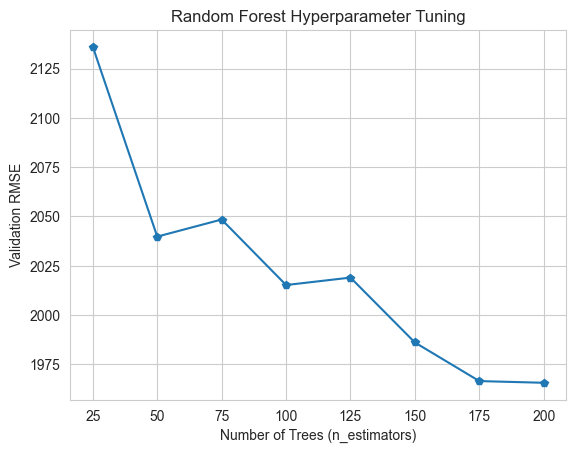

In [13]:
plt.plot(n_estimators_values, rmse_values, marker='p')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Validation RMSE')
plt.title('Random Forest Hyperparameter Tuning')
plt.show()

In [14]:
model_200 = RandomForestRegressor(n_estimators=200, random_state=42)

model_200.fit(X_train, y_train)
y_pred_val_200 = model_200.predict(X_val)

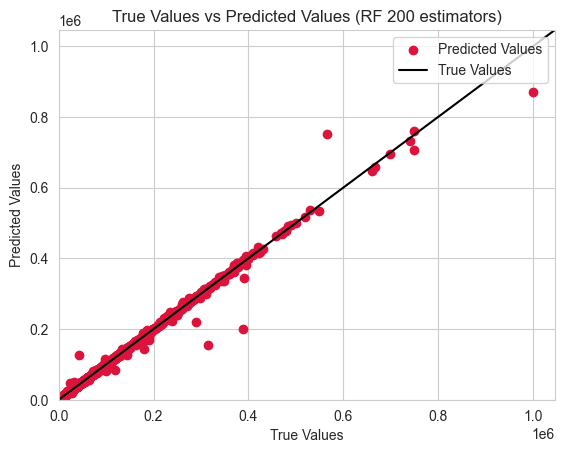

In [64]:

plt.scatter(y_val, y_pred_val_200, c='crimson',label = 'Predicted Values')
plt.plot([0, max(y_val)], [0, max(y_val)], 'black',label = 'True Values')
plt.title('True Values vs Predicted Values (RF 200 estimators)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.xlim(0, max(y_val) + 0.01)
plt.ylim(0, max(y_val))
plt.legend(loc='upper right')
plt.show()